# Introduction

This notebook contains several functions and classes that allow us to quickly conduct Exploratory Data Analysis, such as:
- NaN count
- Basic statistics of the dataset
- Bar chart plots
- Pair Plots
- Scatter Plots
- Correlation heatmaps


# Data ingestion

In [1]:
import pandas as pd
from eda_suite.containers import EdaContainer
from typing import List, Optional, Any, Dict

# 1. Load our data
# df = pd.read_csv(r"C:\Users\TimVos\OneDrive - AIE\Desktop\crack_data.xlsm")
df = pd.read_excel(r"C:\Users\TimVos\OneDrive - AIE\Desktop\crack_data.xlsm")

display(df.head(5))


,Date/time,Vbatt,Temp.,Press.,Channel 1,Channel 1 Temperature,Channel 2,Channel 2 Temperature,Channel 3,Channel 3 Temperature,Channel 4,Channel 4 Temperature,Channel 5,Channel Temperature,Channel 6,Channel 5 Temperature,Channel 7,Channel 7 Temperature,Channel 8,Channel 8 Temperature
0,2024-12-22 18:35:00,6.1,35.4,997.3,3823.6,36.4,2606.0,36.0,3438.1,35.8,N.U.,N.U.,2979.4,36.4,3121.9,37.1,N.U.,N.U.,3096.2,37.1
1,2024-12-22 18:36:00,6.1,35.5,997.6,3822.8,36.4,2606.6,36.0,3437.7,35.8,N.U.,N.U.,2979.4,36.2,3121.9,37.1,N.U.,N.U.,3096.2,36.9
2,2024-12-22 18:37:00,5.9,35.6,997.4,3822.0,36.4,2606.3,35.8,3437.7,35.8,N.U.,N.U.,2979.4,36.2,3121.9,37.1,N.U.,N.U.,3096.2,36.9
3,2024-12-22 18:38:00,5.9,35.5,997.7,3821.6,36.2,2606.3,35.8,3437.7,35.8,N.U.,N.U.,2979.4,36.2,3121.9,36.9,N.U.,N.U.,3096.2,36.9
4,2024-12-22 18:39:00,5.9,35.3,997.3,3821.2,36.2,2606.6,35.8,3437.7,35.8,N.U.,N.U.,2979.4,36.2,3121.9,36.9,N.U.,N.U.,3096.2,36.9


In [2]:
# 2. Create and configure the container
container = EdaContainer()
container.config.df.from_value(df)

# 3. Get the fully assembled analyser
# The container builds the profiler, visualizer, etc., and injects them.
analyzer = container.analyzer()

# 4. Use it! It's that simple.
analyzer.show_profile()

analyzer.show_descriptive_stats()

analyzer.show_missing_values()

analyzer.show_value_occurrences(value_to_find="N.U.")

analyzer.show_mixed_type_report()

# name_map = {'purch_amt': 'Purchase Amount'}
# analyzer.set_column_map(name_map)

# analyzer.plot_distribution('Purchase Amount')

--- DataFrame Heuristic Profile ---
Shape: 45066 rows, 20 columns

Numerical Columns (likely continuous):
  ['Temp.', 'Press.', 'Channel 1', 'Channel 1 Temperature', 'Channel 2', 'Channel 2 Temperature', 'Channel 3', 'Channel 3 Temperature', 'Channel 5', 'Channel  Temperature', 'Channel 6', 'Channel 5 Temperature', 'Channel 8', 'Channel 8 Temperature']

Categorical Columns (likely discrete):
  ['Date/time', 'Vbatt', 'Channel 4', 'Channel 4 Temperature', 'Channel 7', 'Channel 7 Temperature']

ID Columns (high cardinality):
  []
-----------------------------------

--- Descriptive Statistics (Numerical) ---
              Vbatt         Temp.        Press.     Channel 1  Channel 1 Temperature     Channel 2  Channel 2 Temperature     Channel 3  Channel 3 Temperature     Channel 5  Channel  Temperature     Channel 6  Channel 5 Temperature     Channel 8  Channel 8 Temperature
count  45066.000000  45066.000000  45066.000000  45066.000000           45066.000000  45066.000000           45066.000

In [3]:
# Data cleaning
import numpy as np

# Define the columns we know should be numeric
columns_to_clean = [
    'Channel 4', 'Channel 4 Temperature', 
    'Channel 7', 'Channel 7 Temperature'
]

# 1. CLEAN: Replace the "N.U." string with a real null value (NaN)
analyzer.clean_replace_values(
    columns=columns_to_clean, 
    value_to_replace="N.U.", 
    new_value=np.nan
)

# 2. CONVERT: Force the columns to a numeric type. 
# 'coerce' will handle any other unexpected strings.
# This is required so we can properly plot distribitions. Noting that the plot_distributions method does NOT use heuristics, it purely looks at the value type (numeric vs Object)
analyzer.clean_coerce_numeric(columns=columns_to_clean)


--- Replacing Values ---
Replacing 'N.U.' with 'nan' in columns: ['Channel 4', 'Channel 4 Temperature', 'Channel 7', 'Channel 7 Temperature']...
Replacement complete.

--- Coercing to Numeric ---
Attempting to convert columns to numeric: ['Channel 4', 'Channel 4 Temperature', 'Channel 7', 'Channel 7 Temperature']...
Conversion complete.



c:\Users\TimVos\VSC Projects\Exploratory Data Analysis\eda_suite\cleaner.py:61: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self._df[col] = self._df[col].replace(value_to_replace, new_value)


In [4]:
# 3. RE-EXPLORE: Now run the profiler again

analyzer.show_profile()

analyzer.show_descriptive_stats()

analyzer.show_missing_values()

analyzer.show_value_occurrences(value_to_find="N.U.")

analyzer.show_mixed_type_report()

--- DataFrame Heuristic Profile ---
Shape: 45066 rows, 20 columns

Numerical Columns (likely continuous):
  ['Temp.', 'Press.', 'Channel 1', 'Channel 1 Temperature', 'Channel 2', 'Channel 2 Temperature', 'Channel 3', 'Channel 3 Temperature', 'Channel 4', 'Channel 4 Temperature', 'Channel 5', 'Channel  Temperature', 'Channel 6', 'Channel 5 Temperature', 'Channel 7', 'Channel 7 Temperature', 'Channel 8', 'Channel 8 Temperature']

Categorical Columns (likely discrete):
  ['Date/time', 'Vbatt']

ID Columns (high cardinality):
  []
-----------------------------------

--- Descriptive Statistics (Numerical) ---
              Vbatt         Temp.        Press.     Channel 1  Channel 1 Temperature     Channel 2  Channel 2 Temperature     Channel 3  Channel 3 Temperature     Channel 5  Channel  Temperature     Channel 6  Channel 5 Temperature     Channel 8  Channel 8 Temperature
count  45066.000000  45066.000000  45066.000000  45066.000000           45066.000000  45066.000000           45066.000

The initial EDA has shown:

- There were missing values (but marked as N.U.). These have been converted to numpy NaN values. 
- Numerical Columns (likely continuous):
  ['Temp.', 'Press.', 'Channel 1', 'Channel 1 Temperature', 'Channel 2', 'Channel 2 Temperature', 'Channel 3', 'Channel 3 Temperature', 'Channel 4', 'Channel 4 Temperature', 'Channel 5', 'Channel  Temperature', 'Channel 6', 'Channel 5 Temperature', 'Channel 7', 'Channel 7 Temperature', 'Channel 8', 'Channel 8 Temperature']
- Categorical Columns (likely discrete):
  ['Date/time', 'Vbatt']
  Note: Vbatt is numerical, so if we are going to transform it, or use, we must re-specify the numerical_cols list. Same is true for the categorical_cols list. 

--- Plotting Distribution(s) ---


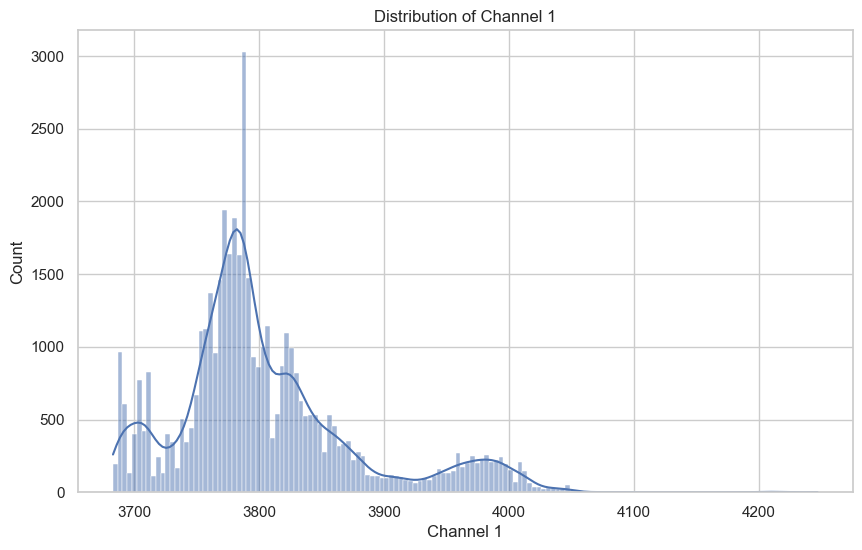

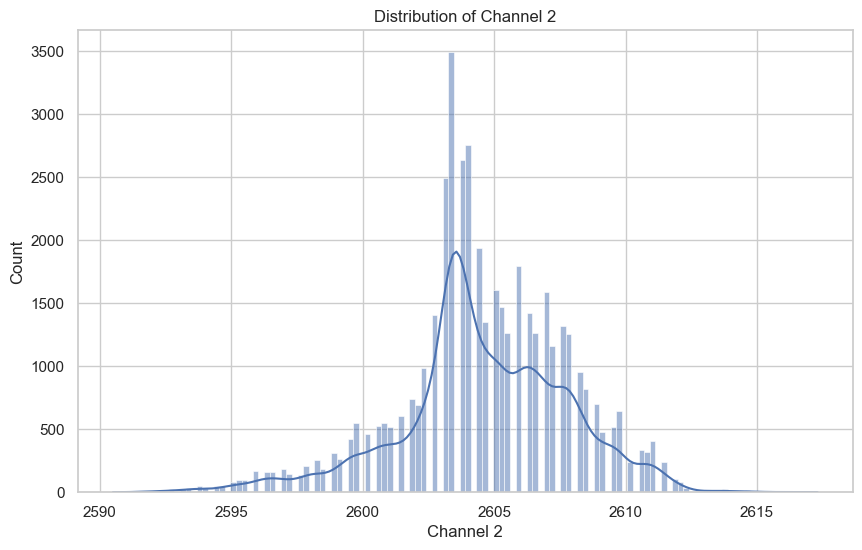

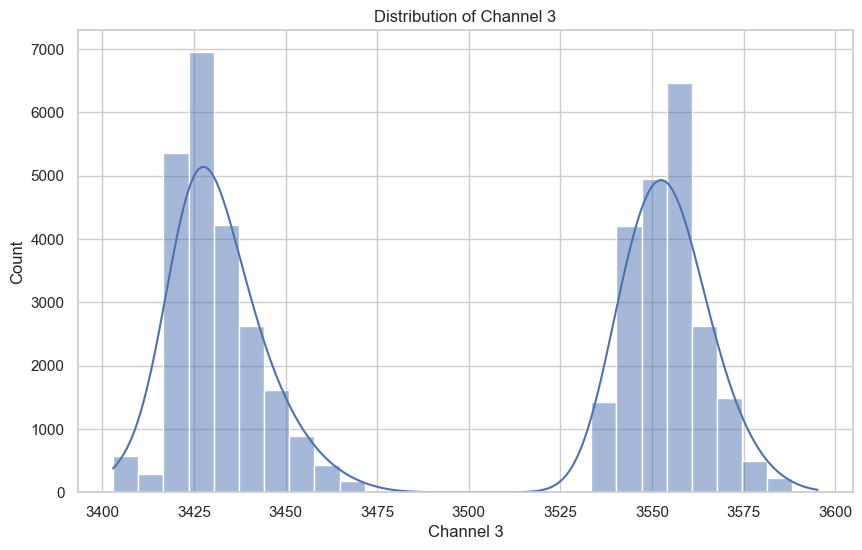

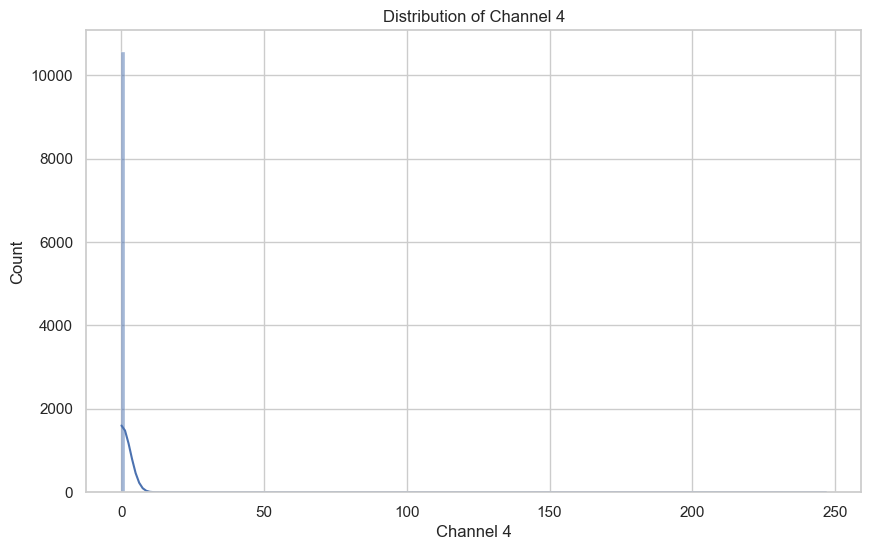

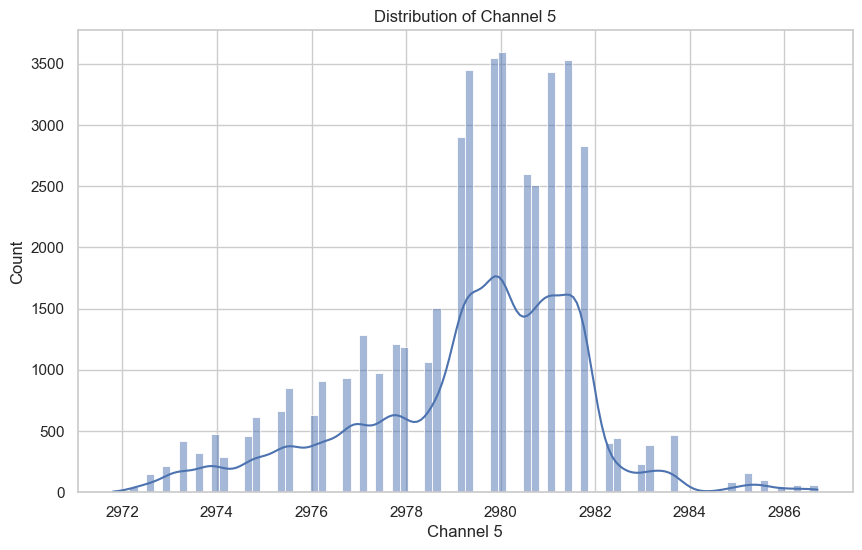

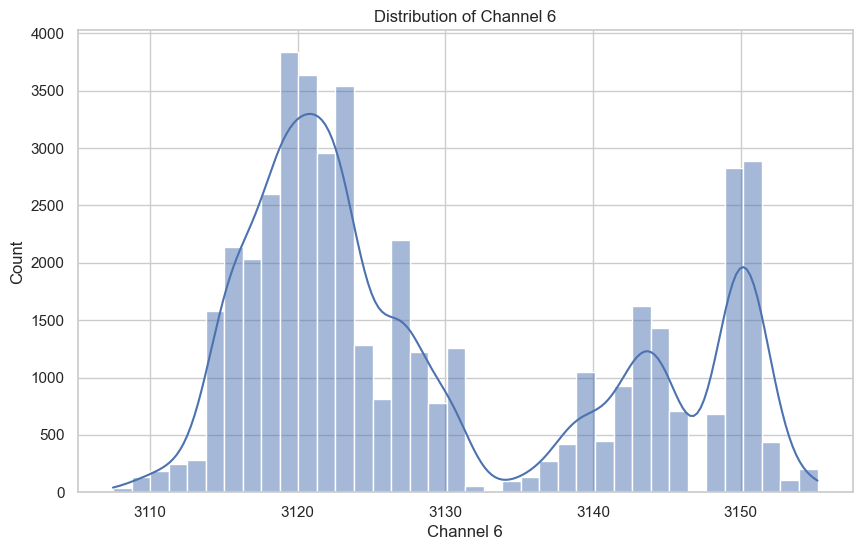

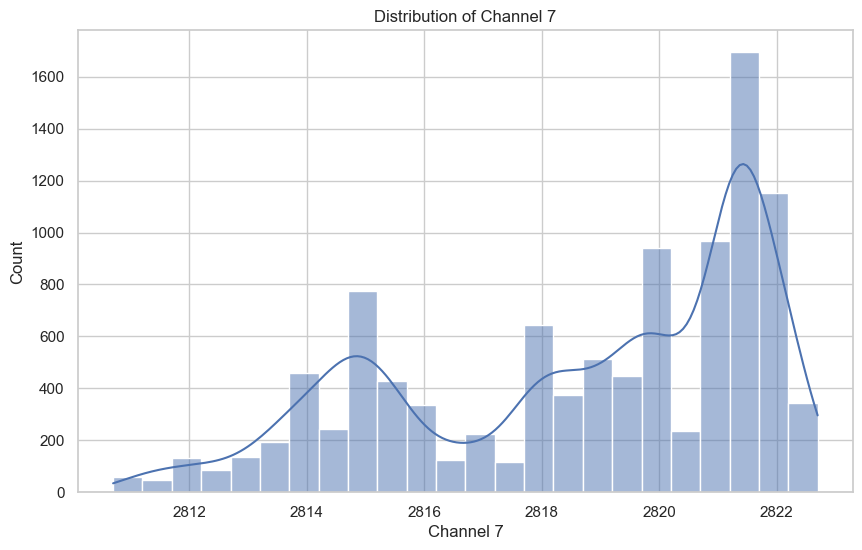

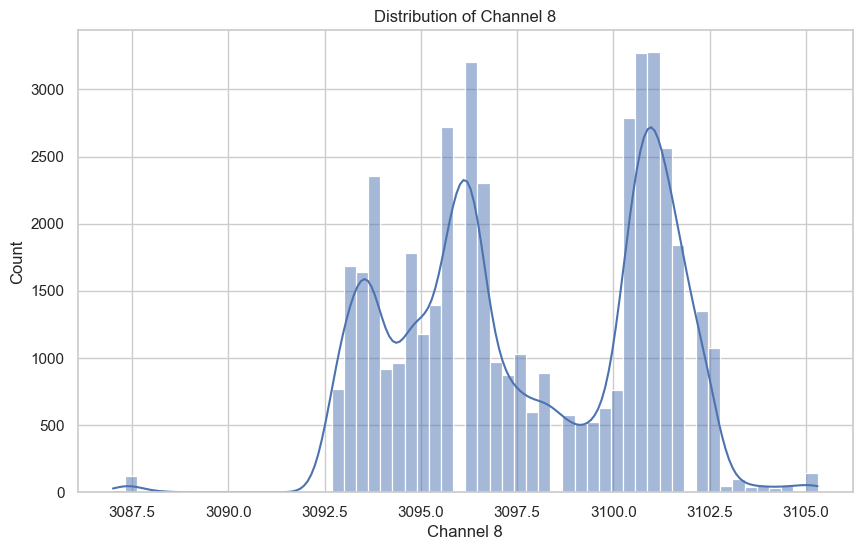

In [5]:

analyzer.plot_distribution([f"Channel {i}" for i in range(1, 9)])

--- Plotting Box Plot(s) ---


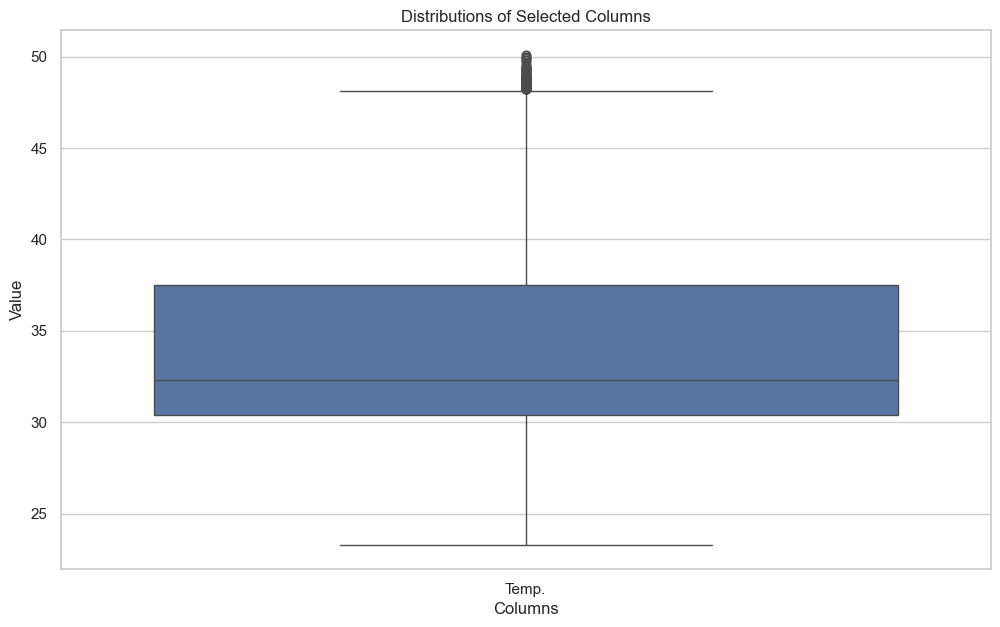

--- Plotting Box Plot(s) ---


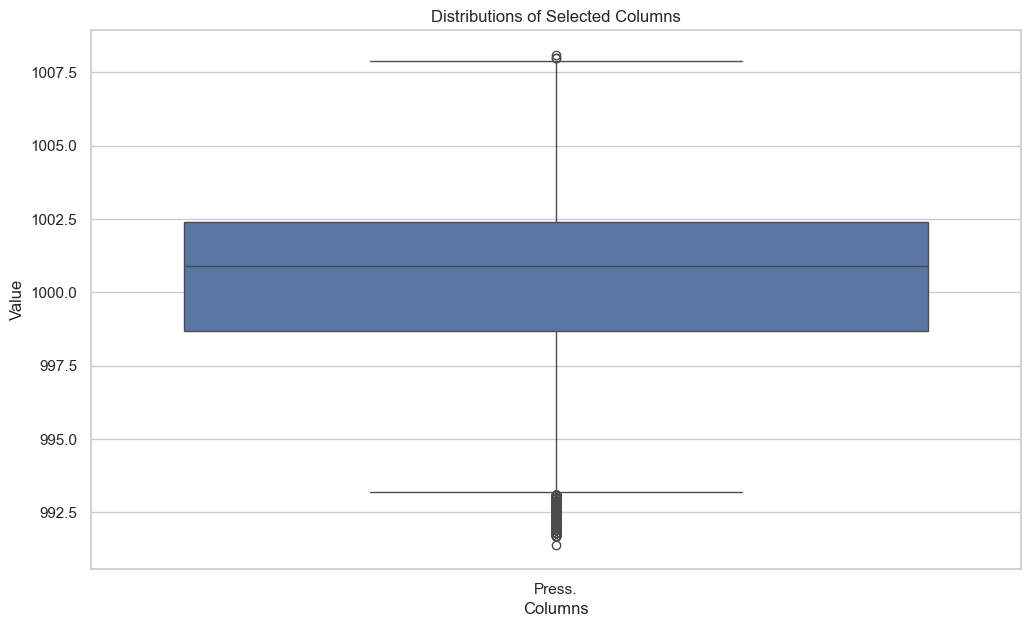

--- Plotting Box Plot(s) ---


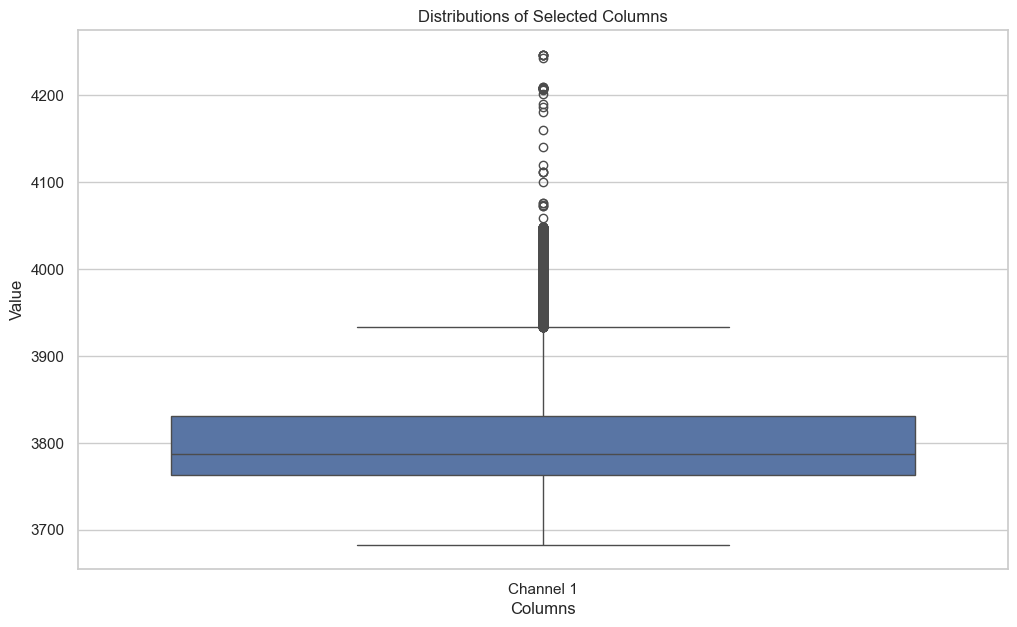

--- Plotting Box Plot(s) ---


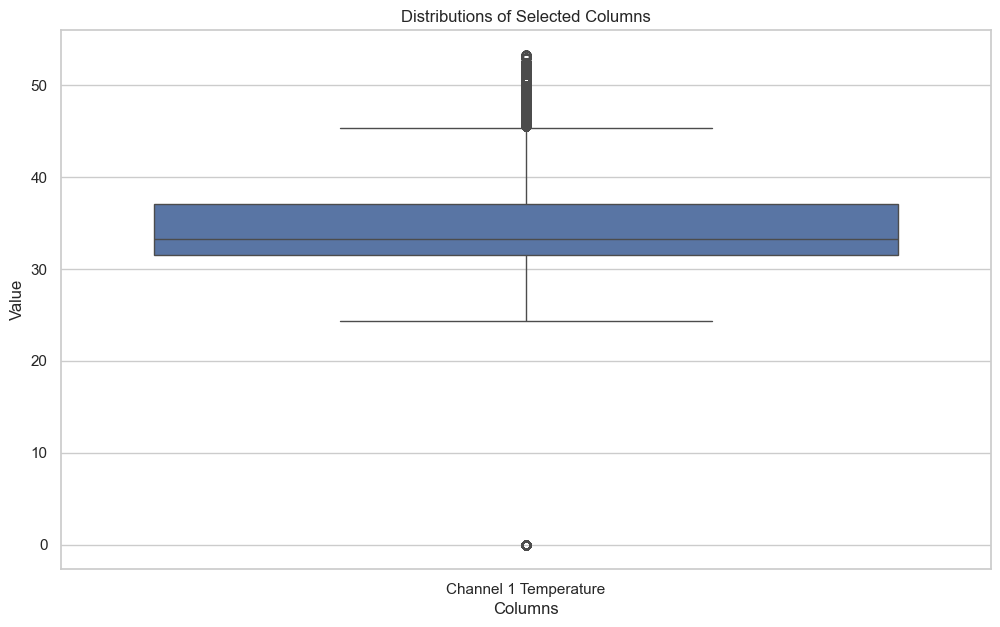

--- Plotting Box Plot(s) ---


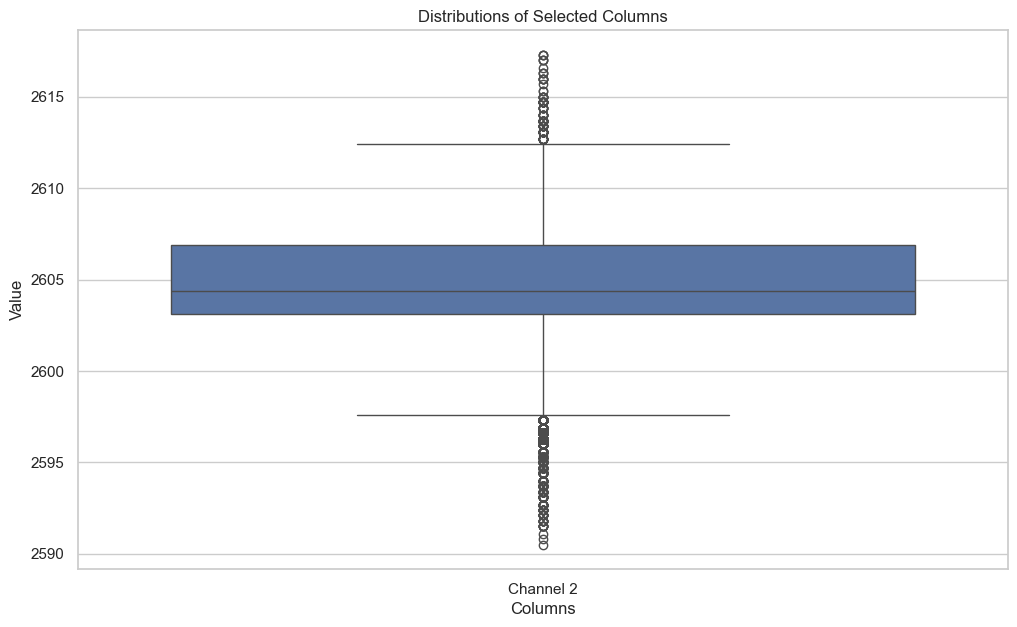

--- Plotting Box Plot(s) ---


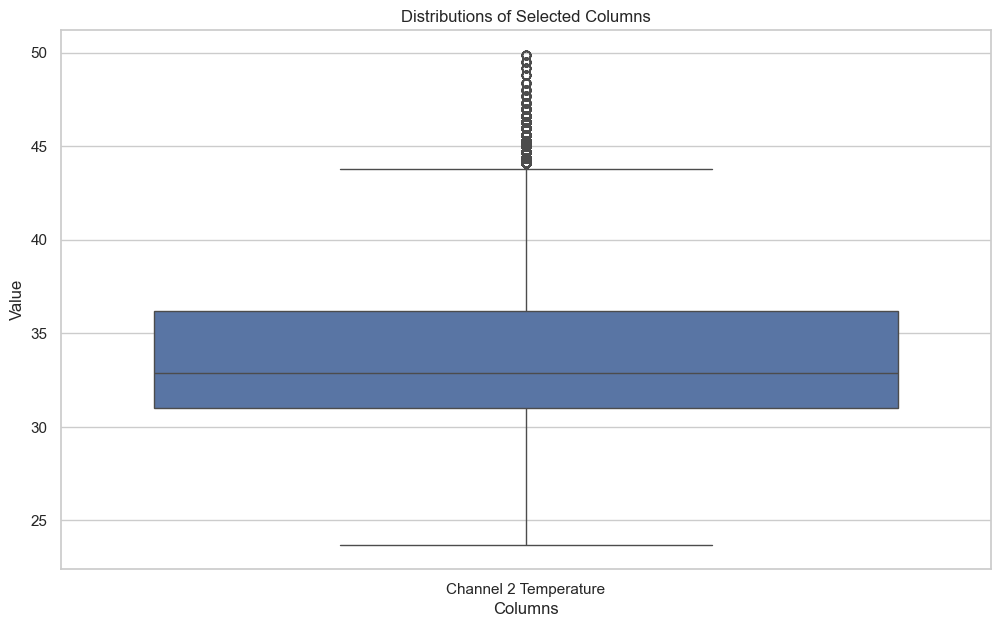

--- Plotting Box Plot(s) ---


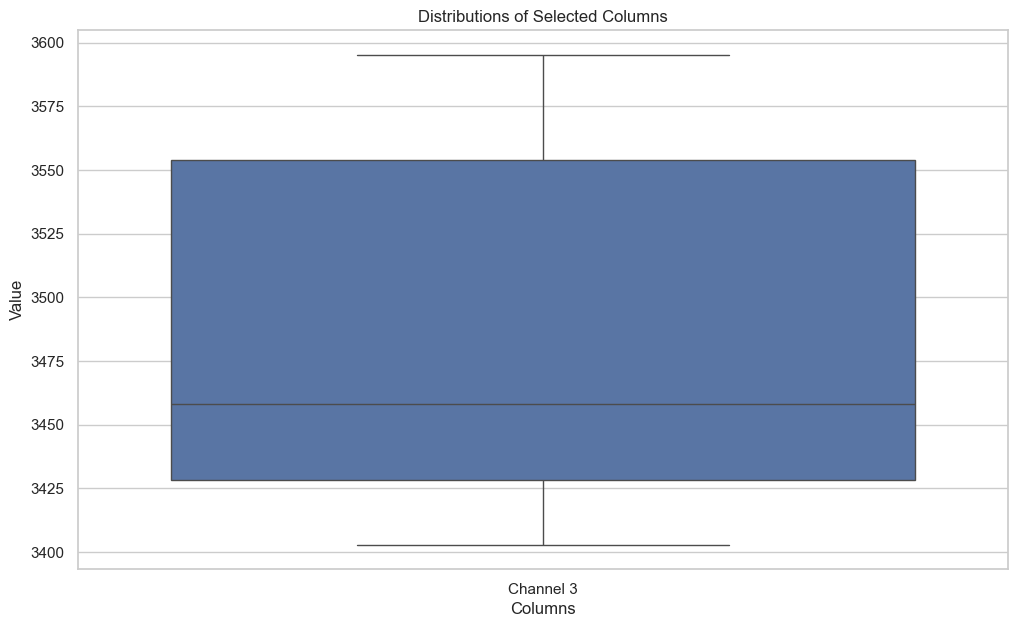

--- Plotting Box Plot(s) ---


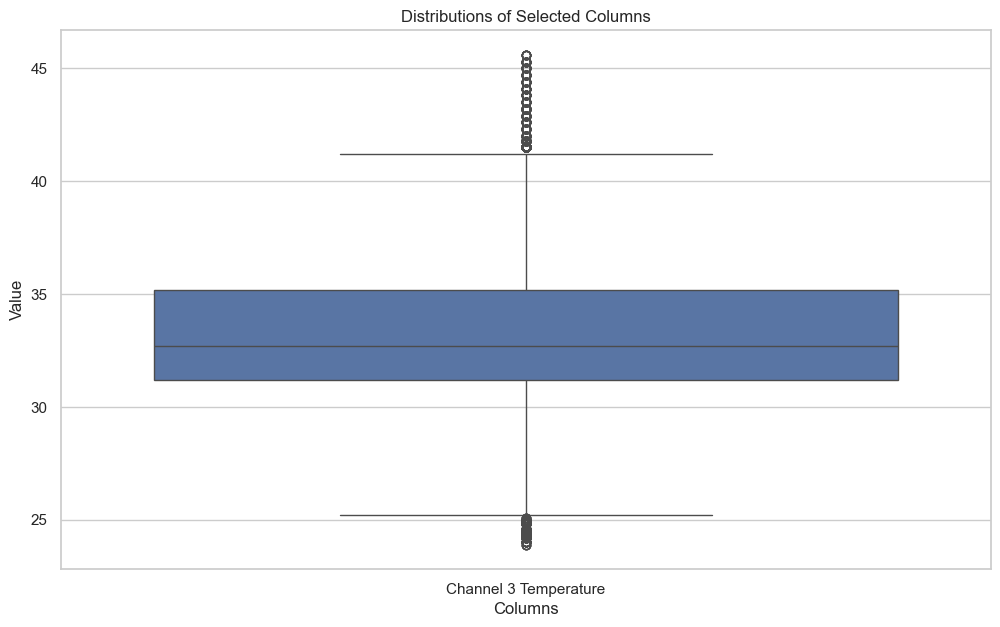

--- Plotting Box Plot(s) ---


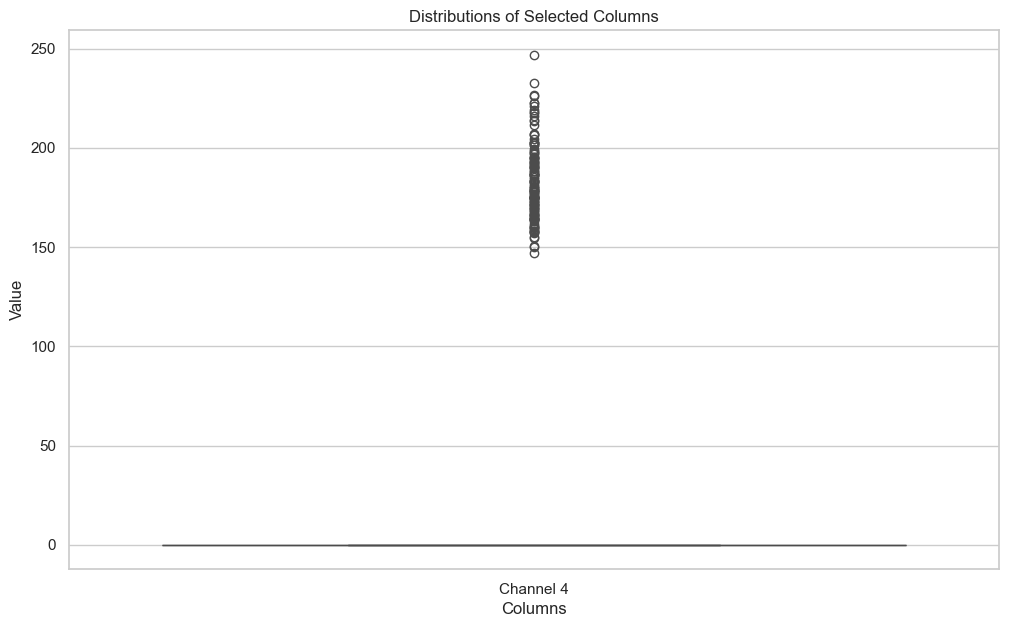

--- Plotting Box Plot(s) ---


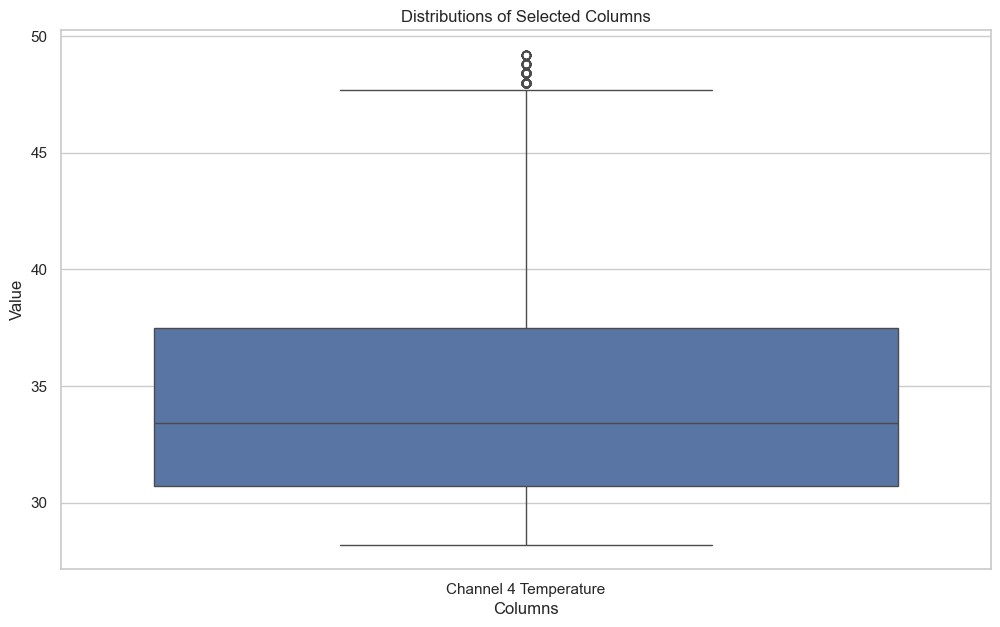

--- Plotting Box Plot(s) ---


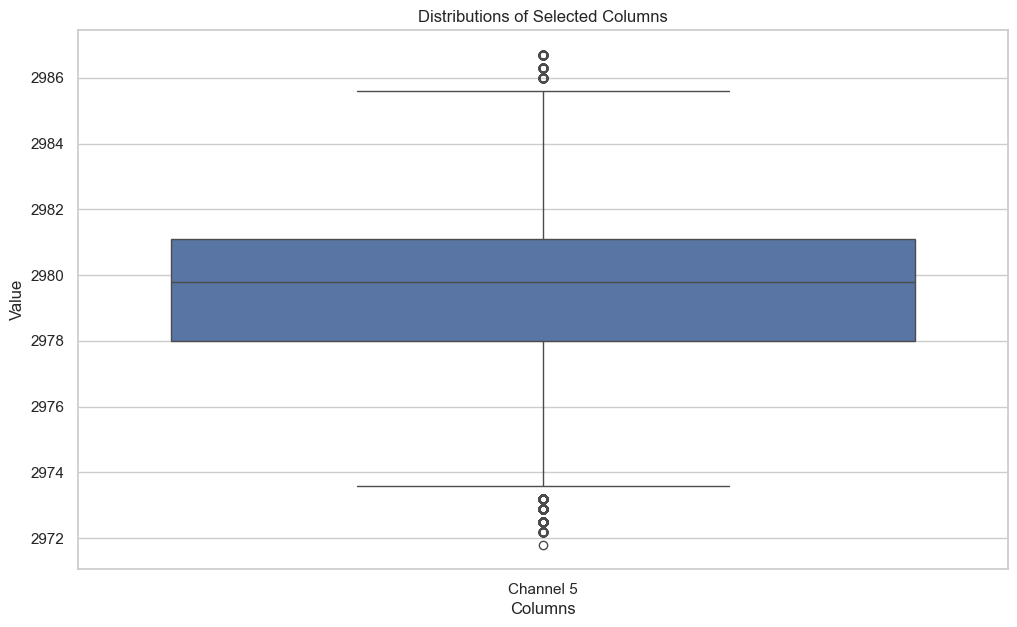

--- Plotting Box Plot(s) ---


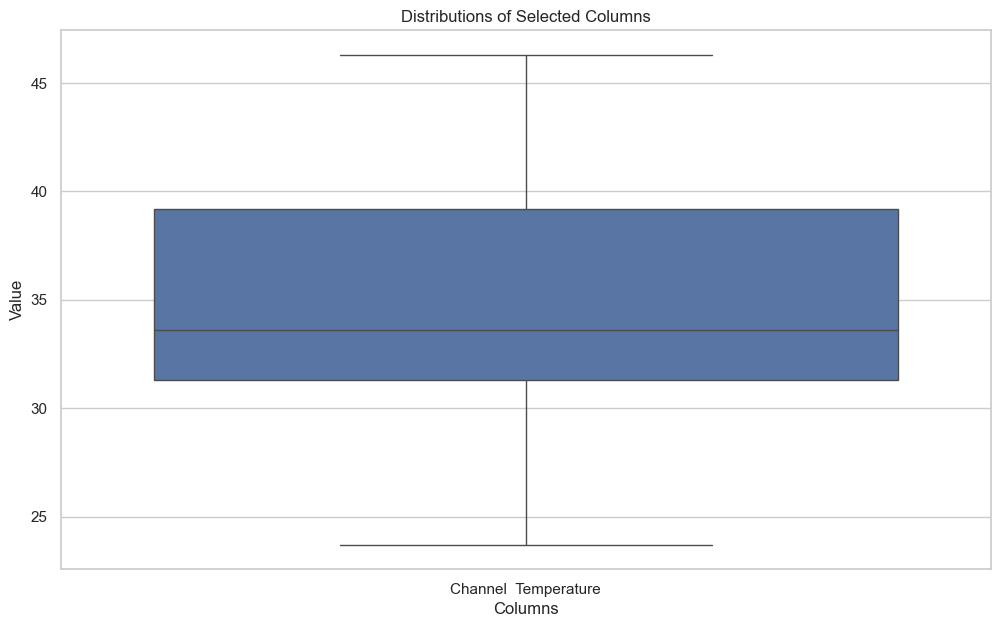

--- Plotting Box Plot(s) ---


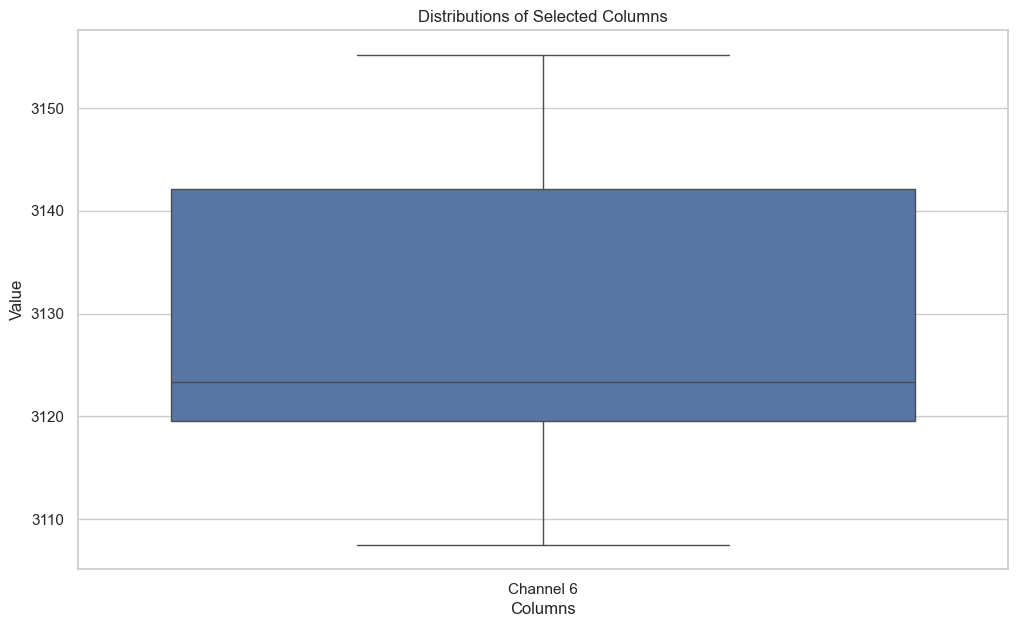

--- Plotting Box Plot(s) ---


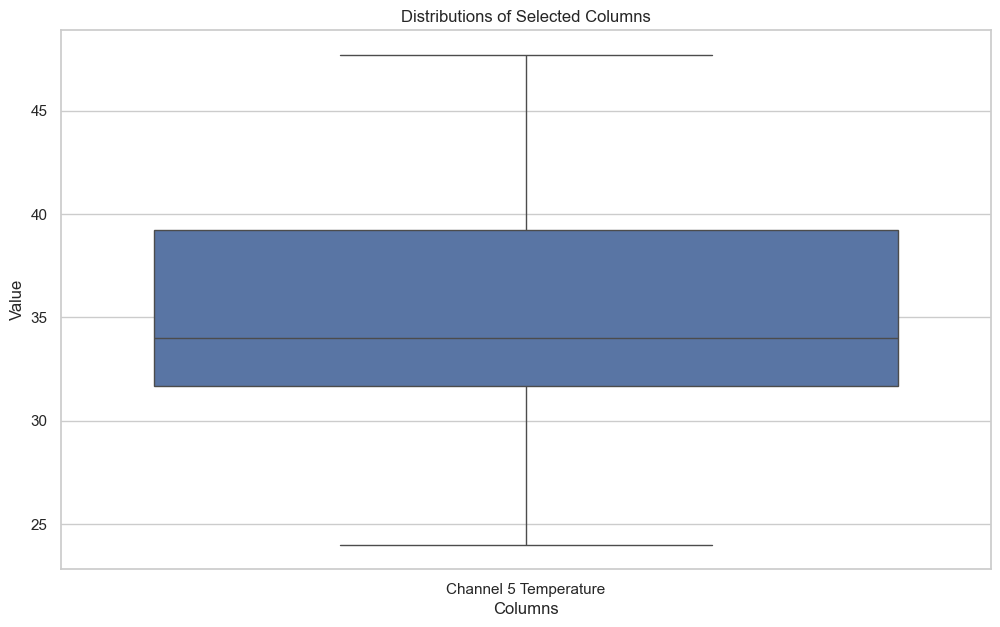

--- Plotting Box Plot(s) ---


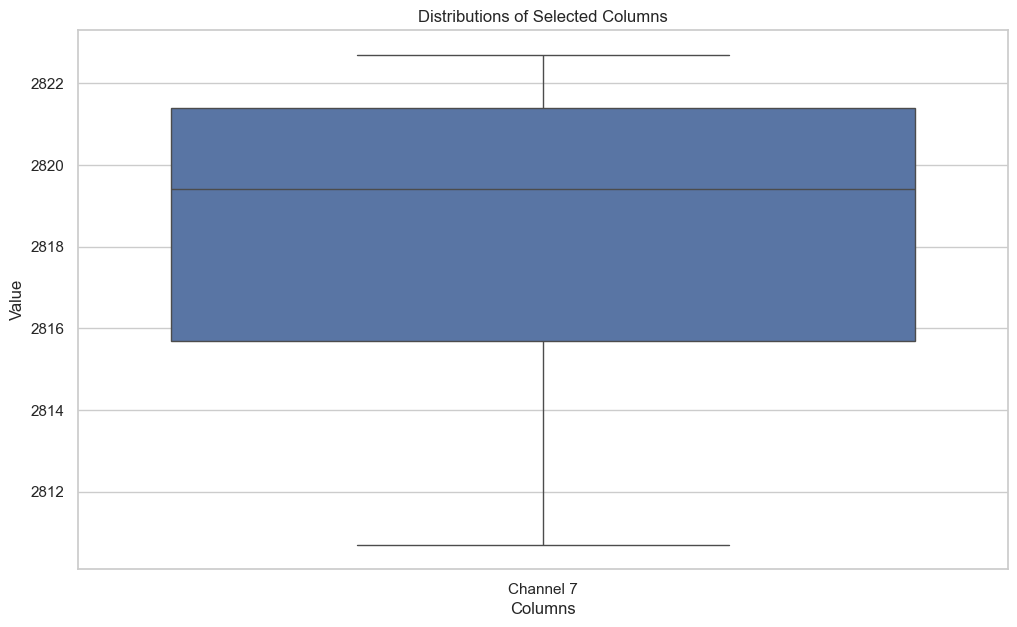

--- Plotting Box Plot(s) ---


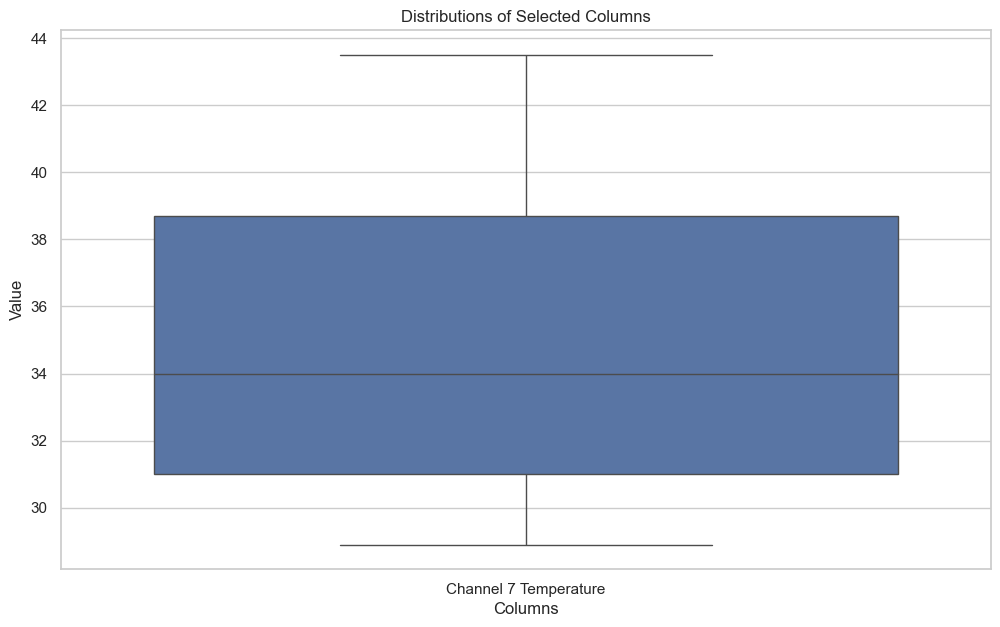

--- Plotting Box Plot(s) ---


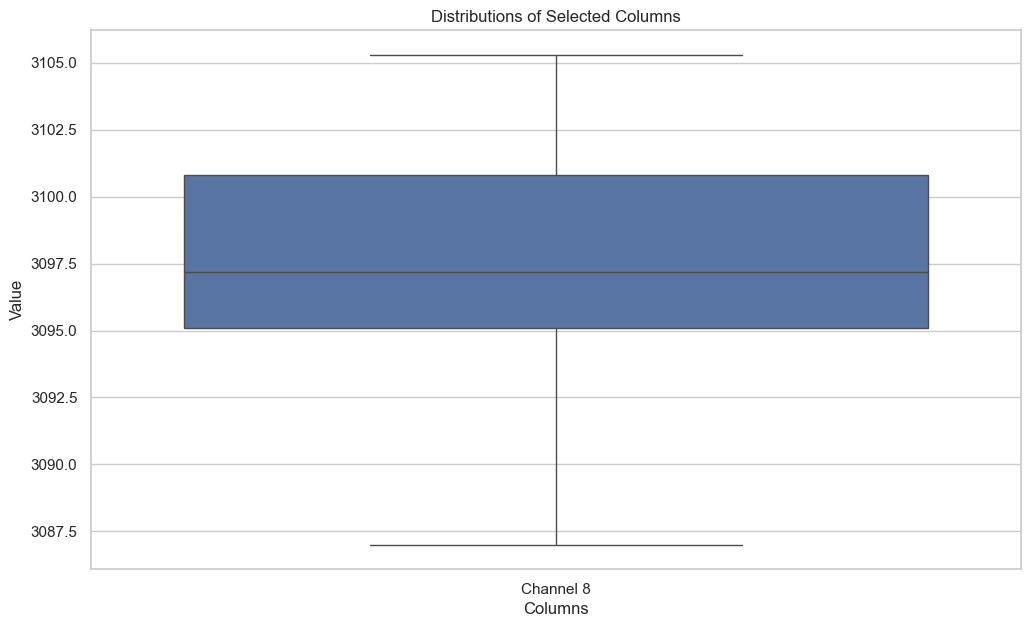

--- Plotting Box Plot(s) ---


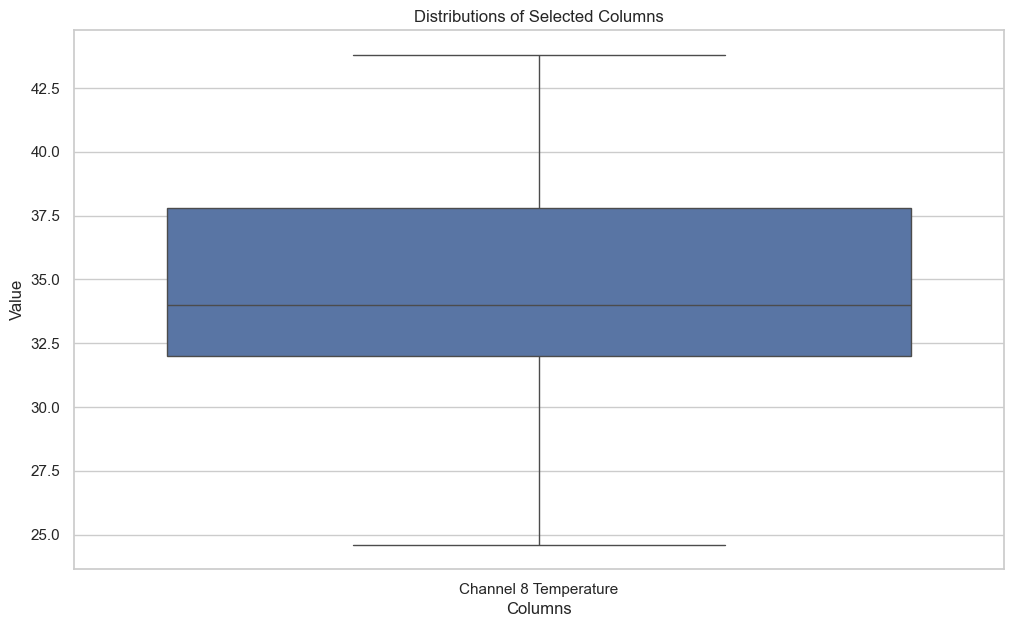

--- Plotting Box Plot(s) ---


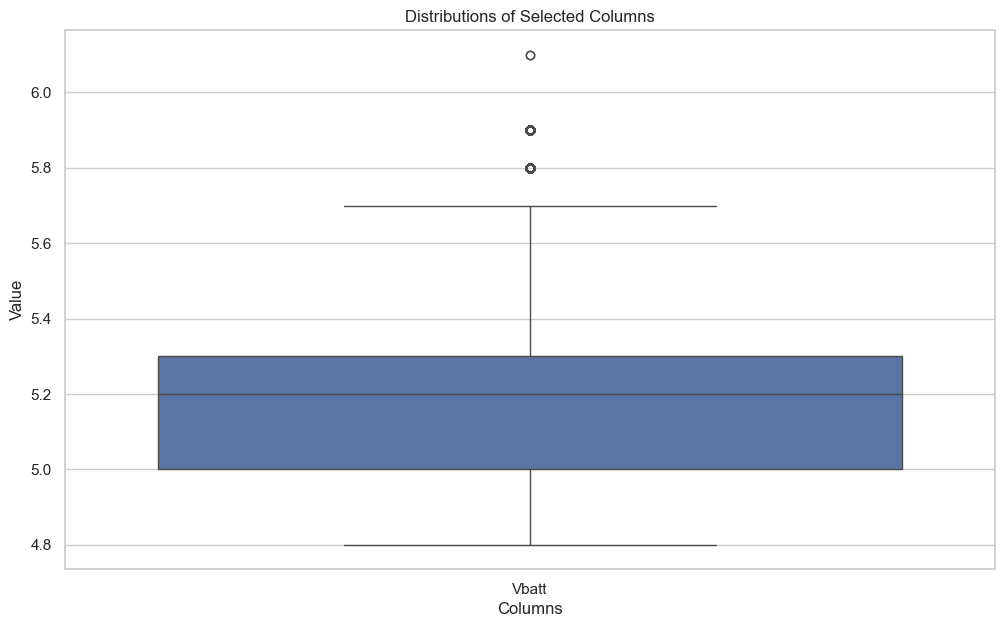

In [6]:
# as discussed and concluded, we must create our own numerical_cols list. Fortunately the analyzer.show_profile() has helped us generate a good start

numerical_cols: List[str] = ['Temp.', 'Press.', 'Channel 1', 'Channel 1 Temperature', 'Channel 2', 'Channel 2 Temperature', 'Channel 3', 'Channel 3 Temperature', 'Channel 4', 'Channel 4 Temperature', 'Channel 5', 'Channel  Temperature', 'Channel 6', 'Channel 5 Temperature', 'Channel 7', 'Channel 7 Temperature', 'Channel 8', 'Channel 8 Temperature', 'Vbatt']

# now we can create boxplots for all of them. 
# visualizer.plot_boxplots(numerical_cols)

# Or, if we want individual plots:
for col in numerical_cols:
    analyzer.plot_boxplots(col)


--- Plotting Scatter Plot ---


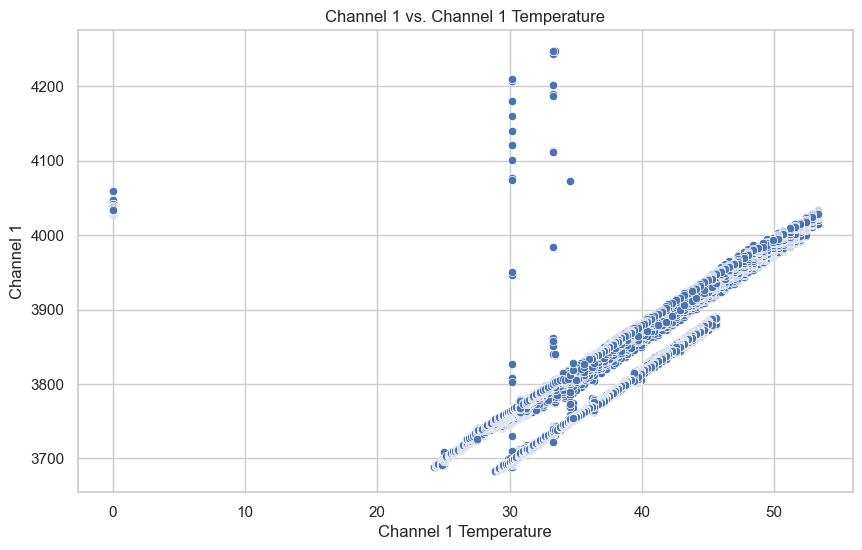

In [8]:
analyzer.plot_scatter("Channel 1 Temperature", "Channel 1")